In [1]:
#!/usr/bin/env python
# coding: utf-8

#Import all the dependencies
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, join
import pandas as pd

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leslie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/leslie/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = pd.read_csv("all_reviewer_reviews.csv")
data['scores'] = data['review'].apply(lambda review: sid.polarity_scores(review))

data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])

data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'all_reviewer_reviews.csv'

In [ ]:
data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

data.head()

In [ ]:
data.to_csv('all_reviewer_reviews_with_score.csv')

In [2]:

docLabels = data['reviewer']

tokenizer = RegexpTokenizer(r'\w+')
stopword_set = set(stopwords.words('english'))
#This function does all cleaning of data using two objects above

def nlp_clean(data):
    new_data = []
    for d in data:
        new_str = d.lower()
        dlist = tokenizer.tokenize(new_str)
        dlist = list(set(dlist).difference(stopword_set))
        new_data.append(dlist)
    return new_data

class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
              yield gensim.models.doc2vec.TaggedDocument(doc, [self.labels_list[idx]])




In [3]:
data = nlp_clean(data['review'])

data


[['b1',
  '30am',
  'frothy',
  'top',
  '529',
  'century',
  '2',
  'toastwich',
  '4',
  'open',
  '60',
  'kun',
  'choice',
  'kaya',
  'chicken',
  'blender',
  'singapore',
  'butter',
  '20',
  'ya',
  '22',
  'interestingly',
  'round',
  'address',
  'central',
  'yang',
  'iced',
  '7',
  'tampines',
  'boiled',
  'breakfast',
  'beverage',
  'square',
  'redang',
  'drink',
  '509',
  'eggs',
  'toast',
  'large',
  'set',
  'selected',
  'yuan',
  '5',
  'soft',
  'teh',
  '9pm'],
 ['fritter',
  'today',
  'north',
  '511',
  'close',
  'tiao',
  'half',
  'long',
  'blk',
  'lunch',
  '4',
  'five',
  '01',
  '77',
  'singapore',
  'lor',
  'belly',
  'bedok',
  'spice',
  'braised',
  'prawn',
  'mee',
  'pork',
  '1',
  'address',
  'kueh',
  '3',
  'friday',
  'roll',
  'sadly',
  'meatballs',
  '460',
  'topped',
  '卤面',
  '50',
  'fish',
  '509',
  'street',
  'egg',
  'queue',
  'note'],
 ['came',
  'avenue',
  '769',
  'sprite',
  'french',
  'cheese',
  '4',
  'op

In [4]:
it = LabeledLineSentence(data, docLabels)

it.doc_list[0] # the first documents

['b1',
 '30am',
 'frothy',
 'top',
 '529',
 'century',
 '2',
 'toastwich',
 '4',
 'open',
 '60',
 'kun',
 'choice',
 'kaya',
 'chicken',
 'blender',
 'singapore',
 'butter',
 '20',
 'ya',
 '22',
 'interestingly',
 'round',
 'address',
 'central',
 'yang',
 'iced',
 '7',
 'tampines',
 'boiled',
 'breakfast',
 'beverage',
 'square',
 'redang',
 'drink',
 '509',
 'eggs',
 'toast',
 'large',
 'set',
 'selected',
 'yuan',
 '5',
 'soft',
 'teh',
 '9pm']

In [5]:
it.labels_list[0]

'alamakgirl'

In [6]:
model = gensim.models.Doc2Vec(vector_size=1000, min_count=5, alpha=0.025, min_alpha=0.025)

model.build_vocab(it)

model.train(it, total_examples= model.corpus_count, epochs = 10, start_alpha=0.002, end_alpha=-0.016)

model.corpus_count ## check the corpus

17773

In [7]:
len(model.dv)

10

In [9]:
# model.save('output.csv')
vocab, vectors = model.wv.key_to_index, model.wv.vectors

# get node name and embedding vector index.
name_index = np.array([(v[0], v[1]) for v in vocab.items()])

# init dataframe using embedding vectors and set index as node name
df =  pd.DataFrame(vectors[name_index[:,1].astype(int)])
df.index = name_index[:, 0]
df.to_csv("word2vec_embedding_by_reviewer.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
singapore,0.298745,0.550762,0.658853,-0.886448,-0.244850,-0.125834,0.666490,0.410213,0.737865,-0.191597,...,-0.244283,0.445518,-1.027390,-0.773731,-0.625780,-0.041465,0.849910,0.157840,0.768657,0.413213
good,0.219153,0.402347,0.482063,-0.649615,-0.179144,-0.092073,0.486310,0.299680,0.539269,-0.140559,...,-0.177605,0.324397,-0.750495,-0.564016,-0.458060,-0.030719,0.619736,0.115423,0.560490,0.302058
sauce,0.248485,0.457527,0.546643,-0.736187,-0.202364,-0.103493,0.552986,0.340082,0.613979,-0.158887,...,-0.201969,0.369811,-0.852748,-0.641948,-0.519815,-0.033258,0.706628,0.129726,0.636542,0.342760
rice,0.236350,0.435641,0.520728,-0.700941,-0.193310,-0.098892,0.527190,0.323851,0.584207,-0.150728,...,-0.192373,0.351003,-0.812466,-0.612318,-0.495123,-0.032009,0.671251,0.124869,0.606350,0.325910
available,0.247930,0.457382,0.546813,-0.738637,-0.202840,-0.104748,0.553097,0.339520,0.614936,-0.159137,...,-0.202082,0.369722,-0.857029,-0.646074,-0.521714,-0.033217,0.708540,0.131059,0.638608,0.343392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dibs,0.001777,0.002880,0.002572,-0.003729,-0.002031,0.000417,0.003142,0.001735,0.003353,-0.001462,...,-0.001816,0.001341,-0.005079,-0.003366,-0.002089,-0.000505,0.004497,0.000142,0.002451,0.001186
k4,0.000061,0.001843,0.002659,-0.002225,-0.001021,-0.000022,0.001344,0.000501,0.002612,-0.000801,...,-0.001024,0.001435,-0.003700,-0.001736,-0.001234,-0.000961,0.002852,0.000779,0.003206,0.001125
recreate,0.001648,0.003564,0.004207,-0.006065,-0.001129,-0.001653,0.004937,0.001681,0.004850,-0.001115,...,-0.001130,0.003193,-0.007115,-0.005323,-0.003414,0.000030,0.005656,0.000104,0.005234,0.002982
bugisjunction,0.000224,0.001754,0.000414,-0.001950,0.000088,-0.000607,0.001438,0.000048,0.001547,-0.000358,...,0.000553,0.000563,-0.001812,-0.002003,-0.001595,-0.000061,0.000415,0.001063,0.001671,0.000402


In [10]:
# model.save('output.csv')
vocab, vectors = model.dv.key_to_index, model.dv.vectors

# get node name and embedding vector index.
name_index = np.array([(v[0], v[1]) for v in vocab.items()])

# init dataframe using embedding vectors and set index as node name
result =  pd.DataFrame(vectors[name_index[:,1].astype(int)])
result.index = name_index[:, 0]
result.to_csv("doc2vec_embedding_by_reviewer.csv")
result

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
alamakgirl,2.021894,3.725153,4.452938,-6.002437,-1.649829,-0.845559,4.504933,2.769329,4.995666,-1.293704,...,-1.638463,2.995055,-6.923183,-5.216961,-4.221213,-0.272791,5.731371,1.059377,5.170520,2.781423
veronicaphua,2.082625,3.844363,4.594351,-6.190938,-1.703028,-0.872632,4.647803,2.857296,5.152894,-1.334230,...,-1.685182,3.078405,-7.116124,-5.362284,-4.339631,-0.282490,5.889398,1.087582,5.314481,2.857152
MightyFoodie,1.616135,2.980475,3.561549,-4.801978,-1.319409,-0.676911,3.602901,2.214350,3.997369,-1.035899,...,-1.307827,2.388024,-5.516033,-4.156703,-3.365716,-0.218903,4.566743,0.842671,4.120335,2.215347
juliuslim,1.740054,3.204143,3.831831,-5.164992,-1.419929,-0.727747,3.873940,2.381720,4.293156,-1.111042,...,-1.399404,2.557835,-5.915149,-4.456961,-3.605682,-0.233830,4.897464,0.905808,4.419326,2.376756
Vanessa_Kou,1.433876,2.638360,3.157129,-4.255453,-1.169028,-0.600272,3.192431,1.961244,3.537404,-0.915239,...,-1.150515,2.102833,-4.861592,-3.663622,-2.963837,-0.193379,4.025606,0.745554,3.631655,1.954650
Eatravel,1.134210,2.086032,2.494877,-3.363771,-0.923988,-0.475118,2.524297,1.551347,2.798385,-0.725094,...,-0.917231,1.676103,-3.874909,-2.918650,-2.362405,-0.153533,3.208193,0.594075,2.894600,1.557241
iSteven,0.769455,1.416467,1.692803,-2.283103,-0.627451,-0.320800,1.712396,1.052305,1.899645,-0.490865,...,-0.623821,1.141107,-2.637689,-1.988082,-1.609024,-0.104244,2.182821,0.403759,1.969724,1.058926
DanielFoodDiary,1.112960,2.053195,2.454028,-3.307651,-0.909228,-0.465239,2.480951,1.525140,2.751019,-0.713227,...,-0.904281,1.653117,-3.818788,-2.877453,-2.329860,-0.151369,3.161734,0.583717,2.853331,1.534387
thiampeng,1.273486,2.345450,2.804213,-3.779074,-1.039416,-0.532119,2.836198,1.743792,3.142910,-0.813930,...,-1.029369,1.879982,-4.347170,-3.276840,-2.650649,-0.172009,3.599579,0.666083,3.246860,1.746664
thefoodcompendium,1.337466,2.463283,2.946906,-3.971544,-1.092139,-0.558492,2.980951,1.831819,3.304880,-0.855432,...,-1.082621,1.976749,-4.570769,-3.443714,-2.787566,-0.181102,3.784092,0.698179,3.413342,1.835805


In [11]:
similar_doc = model.docvecs.most_similar(0) #### similarity with the first document
print(similar_doc)

two_doc = model.docvecs.similarity(it.labels_list[0], it.labels_list[1]) ## similarity between the two documents.
print(two_doc)


[('Eatravel', 1.0), ('DanielFoodDiary', 0.9999999403953552), ('iSteven', 0.9999998211860657), ('thiampeng', 0.9999997615814209), ('thefoodcompendium', 0.9999997019767761), ('veronicaphua', 0.999999463558197), ('MightyFoodie', 0.9999993443489075), ('juliuslim', 0.9999979734420776), ('Vanessa_Kou', 0.9999966621398926)]
0.99999994


<ipython-input-11-83aecec188a2>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_doc = model.docvecs.most_similar(0) #### similarity with the first document
<ipython-input-11-83aecec188a2>:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  two_doc = model.docvecs.similarity(it.labels_list[0], it.labels_list[1]) ## similarity between the two documents.


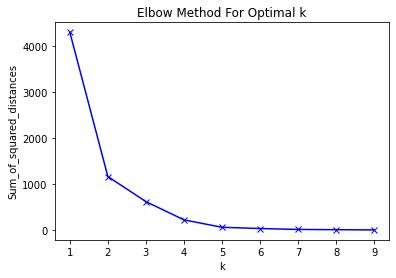

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100)
    #X = kmeans.fit(model.docvecs.doctag_syn0) ###using documnet vecter numbers. doctag_syn0 calls doc2vec that is trained earlier.
    X = kmeans.fit(model.dv.vectors)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100) ### elbow result shows 4 is the best results
#X = kmeans.fit(model.docvecs.doctag_syn0)
X = kmeans.fit(model.dv.vectors)
labels = kmeans.labels_.tolist()

kmeansdata = pd.read_csv("doc2vec_embedding_by_reviewer.csv")
kmeansdata.rename(columns={'Unnamed: 0':'documents'}, inplace=True)
kmeansdata

,documents,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,alamakgirl,2.021894,3.725153,4.452938,-6.002437,-1.649829,-0.845560,4.504933,2.769329,4.995666,...,-1.638463,2.995055,-6.923183,-5.216961,-4.221213,-0.272791,5.731371,1.059377,5.170520,2.781423
1,veronicaphua,2.082625,3.844363,4.594351,-6.190938,-1.703028,-0.872632,4.647803,2.857296,5.152894,...,-1.685182,3.078405,-7.116124,-5.362284,-4.339631,-0.282490,5.889398,1.087582,5.314481,2.857152
2,MightyFoodie,1.616135,2.980475,3.561549,-4.801978,-1.319409,-0.676911,3.602902,2.214350,3.997369,...,-1.307827,2.388024,-5.516033,-4.156702,-3.365716,-0.218903,4.566743,0.842671,4.120335,2.215347
3,juliuslim,1.740054,3.204143,3.831831,-5.164992,-1.419929,-0.727747,3.873940,2.381720,4.293156,...,-1.399404,2.557835,-5.915149,-4.456961,-3.605682,-0.233830,4.897464,0.905808,4.419326,2.376756
4,Vanessa_Kou,1.433876,2.638360,3.157129,-4.255453,-1.169028,-0.600272,3.192431,1.961244,3.537404,...,-1.150515,2.102833,-4.861592,-3.663622,-2.963837,-0.193379,4.025606,0.745554,3.631655,1.954650
5,Eatravel,1.134210,2.086032,2.494877,-3.363771,-0.923988,-0.475118,2.524297,1.551347,2.798385,...,-0.917231,1.676103,-3.874909,-2.918650,-2.362405,-0.153533,3.208193,0.594075,2.894600,1.557241
6,iSteven,0.769455,1.416467,1.692803,-2.283103,-0.627451,-0.320800,1.712396,1.052305,1.899645,...,-0.623821,1.141107,-2.637689,-1.988082,-1.609024,-0.104244,2.182821,0.403759,1.969724,1.058927
7,DanielFoodDiary,1.112960,2.053195,2.454028,-3.307651,-0.909228,-0.465239,2.480951,1.525140,2.751019,...,-0.904281,1.653117,-3.818788,-2.877453,-2.329860,-0.151369,3.161734,0.583717,2.853331,1.534387
8,thiampeng,1.273486,2.345450,2.804213,-3.779074,-1.039416,-0.532119,2.836198,1.743792,3.142910,...,-1.029369,1.879982,-4.347170,-3.276840,-2.650649,-0.172009,3.599579,0.666083,3.246860,1.746664
9,thefoodcompendium,1.337466,2.463283,2.946906,-3.971544,-1.092139,-0.558492,2.980951,1.831819,3.304880,...,-1.082621,1.976749,-4.570769,-3.443714,-2.787566,-0.181102,3.784092,0.698179,3.413342,1.835805


In [15]:

kmeansdata['kmeanscluster'] = labels

kmeansdata.head()

,documents,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,kmeanscluster
0,alamakgirl,2.021894,3.725153,4.452938,-6.002437,-1.649829,-0.845560,4.504933,2.769329,4.995666,...,2.995055,-6.923183,-5.216961,-4.221213,-0.272791,5.731371,1.059377,5.170520,2.781423,2
1,veronicaphua,2.082625,3.844363,4.594351,-6.190938,-1.703028,-0.872632,4.647803,2.857296,5.152894,...,3.078405,-7.116124,-5.362284,-4.339631,-0.282490,5.889398,1.087582,5.314481,2.857152,2
2,MightyFoodie,1.616135,2.980475,3.561549,-4.801978,-1.319409,-0.676911,3.602902,2.214350,3.997369,...,2.388024,-5.516033,-4.156702,-3.365716,-0.218903,4.566743,0.842671,4.120335,2.215347,1
3,juliuslim,1.740054,3.204143,3.831831,-5.164992,-1.419929,-0.727747,3.873940,2.381720,4.293156,...,2.557835,-5.915149,-4.456961,-3.605682,-0.233830,4.897464,0.905808,4.419326,2.376756,1
4,Vanessa_Kou,1.433876,2.638360,3.157129,-4.255453,-1.169028,-0.600272,3.192431,1.961244,3.537404,...,2.102833,-4.861592,-3.663622,-2.963837,-0.193379,4.025606,0.745554,3.631655,1.954650,0


In [16]:
kmeansdata['kmeanscluster'].value_counts()



0    5
2    2
1    2
3    1
Name: kmeanscluster, dtype: int64

In [17]:
df1 = kmeansdata[kmeansdata['kmeanscluster'] == 0]

df1.head()

,documents,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,kmeanscluster
4,Vanessa_Kou,1.433876,2.638360,3.157129,-4.255453,-1.169028,-0.600272,3.192431,1.961244,3.537404,...,2.102833,-4.861592,-3.663622,-2.963837,-0.193379,4.025606,0.745554,3.631655,1.954650,0
5,Eatravel,1.134210,2.086032,2.494877,-3.363771,-0.923988,-0.475118,2.524297,1.551347,2.798385,...,1.676103,-3.874909,-2.918650,-2.362405,-0.153533,3.208193,0.594075,2.894600,1.557241,0
7,DanielFoodDiary,1.112960,2.053195,2.454028,-3.307651,-0.909228,-0.465239,2.480951,1.525140,2.751019,...,1.653117,-3.818788,-2.877453,-2.329860,-0.151369,3.161734,0.583717,2.853331,1.534387,0
8,thiampeng,1.273486,2.345450,2.804213,-3.779074,-1.039416,-0.532119,2.836198,1.743792,3.142910,...,1.879982,-4.347170,-3.276840,-2.650649,-0.172009,3.599579,0.666083,3.246860,1.746664,0
9,thefoodcompendium,1.337466,2.463283,2.946906,-3.971544,-1.092139,-0.558492,2.980951,1.831819,3.304880,...,1.976749,-4.570769,-3.443714,-2.787566,-0.181102,3.784092,0.698179,3.413342,1.835805,0


In [18]:
df1documents = df1['documents']

df1documents.head()

4          Vanessa_Kou
5             Eatravel
7      DanielFoodDiary
8            thiampeng
9    thefoodcompendium
Name: documents, dtype: object

In [19]:
import nltk
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    # stop_free = " ".join([i for i in doc.split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in df1documents]

[nltk_data] Downloading package wordnet to /Users/leslie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]  ##Bag of words Document_term_matrix create.

Lda = gensim.models.ldamodel.LdaModel

ldamodel = Lda(doc_term_matrix, num_topics=100, id2word = dictionary, passes=50)


print(ldamodel.print_topics(num_topics=100, num_words=10))

[(0, '0.400*"eatravel" + 0.150*"thefoodcompendium" + 0.150*"danielfooddiary" + 0.150*"vanessakou" + 0.150*"thiampeng"'), (1, '0.230*"thiampeng" + 0.230*"vanessakou" + 0.230*"danielfooddiary" + 0.230*"thefoodcompendium" + 0.081*"eatravel"')]


In [21]:
output1 = []
for index, topic in ldamodel.show_topics(num_topics=100,formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    output1.append(w[0] for w in topic)
output1_df = pd.DataFrame(output1)
output1_df.to_csv('ldamodel1_by_reviewer.csv')

Topic: 0 
Words: ['eatravel', 'thefoodcompendium', 'danielfooddiary', 'vanessakou', 'thiampeng']
Topic: 1 
Words: ['thiampeng', 'vanessakou', 'danielfooddiary', 'thefoodcompendium', 'eatravel']


In [22]:
df2 = kmeansdata[kmeansdata.kmeanscluster == 1]


df2documents = df2['documents']

doc_clean = [clean(doc).split() for doc in df2documents]

Lda2 = gensim.models.ldamodel.LdaModel

ldamodel2 = Lda(doc_term_matrix, num_topics=100, id2word = dictionary, passes=50)

print(ldamodel2.print_topics(num_topics=100, num_words=10))

[(0, '0.325*"danielfooddiary" + 0.325*"eatravel" + 0.116*"thiampeng" + 0.116*"thefoodcompendium" + 0.116*"vanessakou"'), (1, '0.270*"vanessakou" + 0.270*"thefoodcompendium" + 0.270*"thiampeng" + 0.095*"eatravel" + 0.095*"danielfooddiary"')]


In [23]:
output2 = []
for index, topic in ldamodel2.show_topics(num_topics=100,formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    output2.append(w[0] for w in topic)
output2_df = pd.DataFrame(output2)
output2_df.to_csv('ldamodel2_by_reviewer.csv')

Topic: 0 
Words: ['danielfooddiary', 'eatravel', 'thiampeng', 'thefoodcompendium', 'vanessakou']
Topic: 1 
Words: ['vanessakou', 'thefoodcompendium', 'thiampeng', 'eatravel', 'danielfooddiary']


In [25]:
df3 = kmeansdata[kmeansdata.kmeanscluster == 2]
# df3['documents'] = df3['documents'].values.astype(str)

df3documents = df3['documents']

doc_clean = [clean(doc).split() for doc in df3documents]

Lda3 = gensim.models.ldamodel.LdaModel

ldamodel3 = Lda(doc_term_matrix, num_topics=100, id2word = dictionary, passes=50)

print(ldamodel3.print_topics(num_topics=100, num_words=10))

[(0, '0.325*"eatravel" + 0.325*"thefoodcompendium" + 0.116*"danielfooddiary" + 0.116*"vanessakou" + 0.116*"thiampeng"'), (1, '0.270*"thiampeng" + 0.270*"vanessakou" + 0.270*"danielfooddiary" + 0.095*"thefoodcompendium" + 0.095*"eatravel"')]


In [26]:
output3 = []
for index, topic in ldamodel3.show_topics(num_topics=100,formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    output3.append(w[0] for w in topic)
output3_df = pd.DataFrame(output3)
output3_df.to_csv('ldamodel3_by_reviewer.csv')

Topic: 0 
Words: ['eatravel', 'thefoodcompendium', 'danielfooddiary', 'vanessakou', 'thiampeng']
Topic: 1 
Words: ['thiampeng', 'vanessakou', 'danielfooddiary', 'thefoodcompendium', 'eatravel']


In [27]:
df4 = kmeansdata[kmeansdata.kmeanscluster == 3]
# df3['documents'] = df3['documents'].values.astype(str)

df4documents = df4['documents']

doc_clean = [clean(doc).split() for doc in df4documents]

Lda4 = gensim.models.ldamodel.LdaModel

ldamodel4 = Lda(doc_term_matrix, num_topics=100, id2word = dictionary, passes=50)

print(ldamodel4.print_topics(num_topics=100, num_words=10))

[(0, '0.270*"eatravel" + 0.270*"vanessakou" + 0.270*"thiampeng" + 0.095*"danielfooddiary" + 0.095*"thefoodcompendium"'), (1, '0.325*"danielfooddiary" + 0.325*"thefoodcompendium" + 0.116*"thiampeng" + 0.116*"vanessakou" + 0.116*"eatravel"')]


In [28]:
output4 = []
for index, topic in ldamodel4.show_topics(num_topics=100,formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    output4.append(w[0] for w in topic)
output4_df = pd.DataFrame(output3)
output4_df.to_csv('ldamodel4_by_reviewer.csv')

Topic: 0 
Words: ['eatravel', 'vanessakou', 'thiampeng', 'danielfooddiary', 'thefoodcompendium']
Topic: 1 
Words: ['danielfooddiary', 'thefoodcompendium', 'thiampeng', 'vanessakou', 'eatravel']
